In [1]:
Obesity <- read.csv(file = 'C:\\Users\\marla\\Documents\\Proyecto R\\Obesity.csv')

In [2]:
head(Obesity)

Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
Female,21,1.62,64.0,yes,no,2,3,Sometimes,no,2,no,0,1,no,Public_Transportation,Normal_Weight
Female,21,1.52,56.0,yes,no,3,3,Sometimes,yes,3,yes,3,0,Sometimes,Public_Transportation,Normal_Weight
Male,23,1.80,77.0,yes,no,2,3,Sometimes,no,2,no,2,1,Frequently,Public_Transportation,Normal_Weight
Male,27,1.80,87.0,no,no,3,3,Sometimes,no,2,no,2,0,Frequently,Walking,Overweight_Level_I
Male,22,1.78,89.8,no,no,2,1,Sometimes,no,2,no,0,0,Sometimes,Public_Transportation,Overweight_Level_II
Male,29,1.62,53.0,no,yes,2,3,Sometimes,no,2,no,0,0,Sometimes,Automobile,Normal_Weight


In [3]:
summary(Obesity)

    Gender          Age            Height          Weight      
 Female:1043   Min.   :14.00   Min.   :1.450   Min.   : 39.00  
 Male  :1068   1st Qu.:19.95   1st Qu.:1.630   1st Qu.: 65.47  
               Median :22.78   Median :1.700   Median : 83.00  
               Mean   :24.31   Mean   :1.702   Mean   : 86.59  
               3rd Qu.:26.00   3rd Qu.:1.768   3rd Qu.:107.43  
               Max.   :61.00   Max.   :1.980   Max.   :173.00  
                                                               
 family_history_with_overweight  FAVC           FCVC            NCP       
 no : 385                       no : 245   Min.   :1.000   Min.   :1.000  
 yes:1726                       yes:1866   1st Qu.:2.000   1st Qu.:2.659  
                                           Median :2.386   Median :3.000  
                                           Mean   :2.419   Mean   :2.686  
                                           3rd Qu.:3.000   3rd Qu.:3.000  
                                      

In [4]:
install.packages("FactoClass")

package 'FactoClass' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\marla\AppData\Local\Temp\Rtmp8skSCM\downloaded_packages


In [5]:
library(FactoClass)

Warning message:
"package 'FactoClass' was built under R version 3.6.3"Loading required package: ade4
Warning message:
"package 'ade4' was built under R version 3.6.3"Loading required package: ggplot2
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Loading required package: ggrepel
Warning message:
"package 'ggrepel' was built under R version 3.6.3"Loading required package: xtable
Loading required package: scatterplot3d


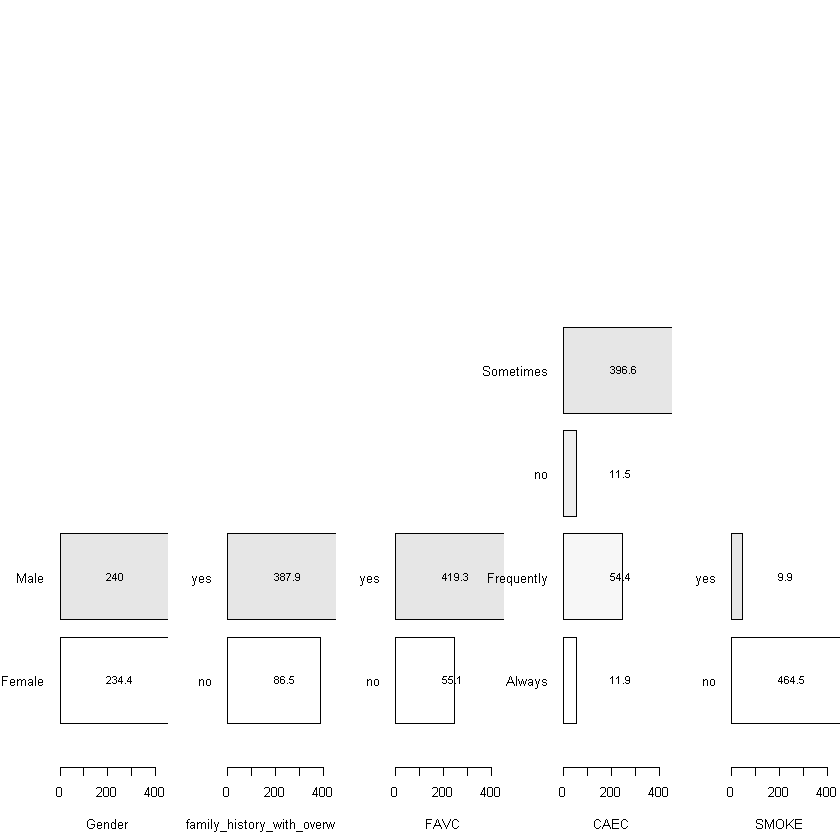

In [6]:
par(las=1, mfrow=c(1,5), mai = c(0.6,0.5,0.2,0.1))
for (i in c(1,5,6,9,10)){
cat <- attributes(Obesity[,i])$levels;
  per<-tabulate(Obesity[,i])/445*100;
   pl <-plot(Obesity[,i], horiz= TRUE, col=gray(seq(1.0,0.9,
       length = length(cat))), ylim =c(0,8),
             xlim=c(0,400), xlab= colnames(Obesity)[i]);
    text(160,pl,round(per,1),cex=0.8, pos=4);
}


In [2]:
install.packages("sqldf")

package 'sqldf' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\marla\AppData\Local\Temp\RtmpuGSlbx\downloaded_packages


In [8]:
library(sqldf)
sqldf('select count(*) from Obesity')

Warning message:
"package 'sqldf' was built under R version 3.6.3"Loading required package: gsubfn
Warning message:
"package 'gsubfn' was built under R version 3.6.3"Loading required package: proto
Warning message:
"package 'proto' was built under R version 3.6.3"Loading required package: RSQLite
Warning message:
"package 'RSQLite' was built under R version 3.6.3"

count(*)
2111


In [1]:
Obesity <- read.csv(file = 'C:\\Users\\marla\\Documents\\Proyecto R\\Obesity.csv')
install.packages("sqldf")
library(sqldf)
Obesity2 <- sqldf('select case 
when MTRANS = "Bike" or MTRANS= "Walking" then "No_transportation"
when MTRANS = "Public_Transportation" or MTRANS= "Motorbike" or MTRANS= "Automobile" then "with_transportation"
 end as "Transportation",
case 
when NObeyesdad= "Obesity_Type_II" or NObeyesdad= "Obesity_Type_I" or NObeyesdad= "Obesity_Type_III" then "Obesity"
when NObeyesdad= "Normal_Weight" then "Normal" 
when NObeyesdad= "Insufficient_Weight" then "Insufficient" 
when NObeyesdad= "Overweight_Level_I" or NObeyesdad= "Overweight_Level_II" then "Overweight" end as "ObesityType"
, * from Obesity ')

package 'sqldf' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\marla\AppData\Local\Temp\RtmpcdnFPa\downloaded_packages


Warning message:
"package 'sqldf' was built under R version 3.6.3"Loading required package: gsubfn
Warning message:
"package 'gsubfn' was built under R version 3.6.3"Loading required package: proto
Warning message:
"package 'proto' was built under R version 3.6.3"Loading required package: RSQLite
Warning message:
"package 'RSQLite' was built under R version 3.6.3"

In [6]:
Obesity3 <- sqldf('alter table Obesity2 drop MTRANS')

Warning message in result_fetch(res@ptr, n = n):
"SQL statements must be issued with dbExecute() or dbSendStatement() instead of dbGetQuery() or dbSendQuery()."

In [3]:
head(Obesity2)

Transportation,ObesityType,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
with_transportation,Normal,Female,21,1.62,64.0,yes,no,2,3,Sometimes,no,2,no,0,1,no,Public_Transportation,Normal_Weight
with_transportation,Normal,Female,21,1.52,56.0,yes,no,3,3,Sometimes,yes,3,yes,3,0,Sometimes,Public_Transportation,Normal_Weight
with_transportation,Normal,Male,23,1.80,77.0,yes,no,2,3,Sometimes,no,2,no,2,1,Frequently,Public_Transportation,Normal_Weight
No_transportation,Overweight,Male,27,1.80,87.0,no,no,3,3,Sometimes,no,2,no,2,0,Frequently,Walking,Overweight_Level_I
with_transportation,Overweight,Male,22,1.78,89.8,no,no,2,1,Sometimes,no,2,no,0,0,Sometimes,Public_Transportation,Overweight_Level_II
with_transportation,Normal,Male,29,1.62,53.0,no,yes,2,3,Sometimes,no,2,no,0,0,Sometimes,Automobile,Normal_Weight


In [4]:
summary(Obesity2)

 Transportation     ObesityType           Gender          Age       
 Length:2111        Length:2111        Female:1043   Min.   :14.00  
 Class :character   Class :character   Male  :1068   1st Qu.:19.95  
 Mode  :character   Mode  :character                 Median :22.78  
                                                     Mean   :24.31  
                                                     3rd Qu.:26.00  
                                                     Max.   :61.00  
                                                                    
     Height          Weight       family_history_with_overweight  FAVC     
 Min.   :1.450   Min.   : 39.00   no : 385                       no : 245  
 1st Qu.:1.630   1st Qu.: 65.47   yes:1726                       yes:1866  
 Median :1.700   Median : 83.00                                            
 Mean   :1.702   Mean   : 86.59                                            
 3rd Qu.:1.768   3rd Qu.:107.43                                     